In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Sequential
# Functional
# Model subcalssing, the lower the more free

In [3]:
x_train = tf.random.normal(shape = (100, 1), dtype = tf.float32)
y_train = 3*x_train + 1 + 0.2*tf.random.normal(shape = (100, 1), dtype = tf.float32)

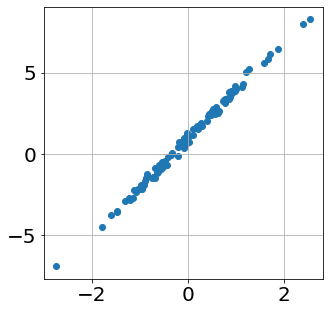

In [4]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.scatter(x_train.numpy(), y_train.numpy())
ax.tick_params(labelsize = 20)
ax.grid()

In [5]:
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(units = 1, # Dense = fully connected, unit = # of neurons
                          activation = 'linear')
    ])

In [6]:
model.compile(loss = 'mean_squared_error', 
              optimizer = 'SGD')

In [7]:
model.fit(x_train, y_train, epochs = 10, verbose = 1) # verbose simplifies the message

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 6.4334
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 5.6358
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 5.0245
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 4.2972
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 3.7949
Epoch 6/10
4/4 [==============================] - 0s 5ms/step - loss: 3.3400
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 2.9735
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 2.6609
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 2.3358
Epoch 10/10
4/4 [==============================] - 0s 6ms/step - loss: 1.9828


In [8]:
# Model Sub-classing
class LinearPredictor(tf.keras.Model):
    def __init__(self):
        super(LinearPredictor, self).__init__()
        
        self.d1 = tf.keras.layers.Dense(units = 1, activation = 'linear') # define layer
        
    def call(self, x): # forward propagation
        x = self.d1(x)
        return x

In [9]:
# Hyperparameters
epochs = 10
LR = 0.01

In [10]:
# loss function and opmizer setting
model_class = LinearPredictor()

loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.SGD(learning_rate = LR)

In [11]:
# learning
for epoch in range(epochs):
    for x, y in zip(x_train, y_train):
        x = tf.reshape(x, (1, 1))
        with tf.GradientTape() as tape:
            predictions = model_class(x) # Operate based on call defined in class
            loss = loss_object(y, predictions)
            
        gradients = tape.gradient(loss, model_class.trainable_variables) # gradient about loss based on trainable_variables
        optimizer.apply_gradients(zip(gradients, model_class.trainable_variables)) # parameter update
        
    print('Epoch: ', epoch+1)
    template = 'Train Loss: {:.4f}\n'
    print(template.format(loss))

Epoch:  1
Train Loss: 1.0406

Epoch:  2
Train Loss: 0.1540

Epoch:  3
Train Loss: 0.0766

Epoch:  4
Train Loss: 0.0654

Epoch:  5
Train Loss: 0.0635

Epoch:  6
Train Loss: 0.0632

Epoch:  7
Train Loss: 0.0631

Epoch:  8
Train Loss: 0.0631

Epoch:  9
Train Loss: 0.0631

Epoch:  10
Train Loss: 0.0631

